In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

!pip install pydataset
from pydataset import data

# Practice With Plotting and MatplotLib

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/17w9X0_yiiHfJ-3XGynUnsrvNxmlGG4aR?usp=sharing)

In [2]:
# Example preloaded datasets to pick from
dataset_list = data()
dataset_list

,dataset_id,title
0,AirPassengers,Monthly Airline Passenger Numbers 1949-1960
1,BJsales,Sales Data with Leading Indicator
2,BOD,Biochemical Oxygen Demand
3,Formaldehyde,Determination of Formaldehyde
4,HairEyeColor,Hair and Eye Color of Statistics Students
...,...,...
752,VerbAgg,Verbal Aggression item responses
753,cake,Breakage Angle of Chocolate Cakes
754,cbpp,Contagious bovine pleuropneumonia
755,grouseticks,Data on red grouse ticks from Elston et al. 2001


## Single Plot

In [3]:
iq_df = data('Burt')
iq_df.head(5)

,IQbio,IQfoster,class
1,82,82,high
2,80,90,high
3,88,91,high
4,108,115,high
5,116,115,high


In [4]:
# Quickly checking contents of "class" column
iq_df['class'].value_counts().to_frame().reset_index()

,class,count
0,low,14
1,high,7
2,medium,6


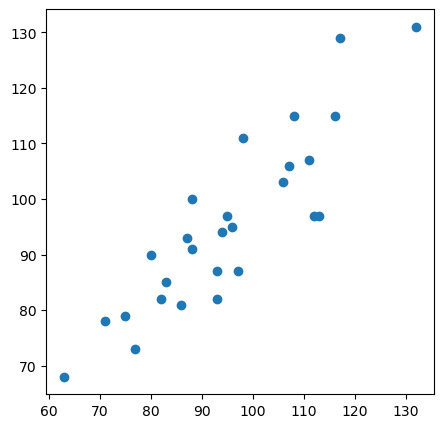

In [5]:
# Assuming 'IQbio' and 'IQfoster' are numeric and you want to plot these against each other
plt.figure(figsize=(5, 5))
plt.scatter(iq_df['IQbio'], iq_df['IQfoster'])
plt.show()

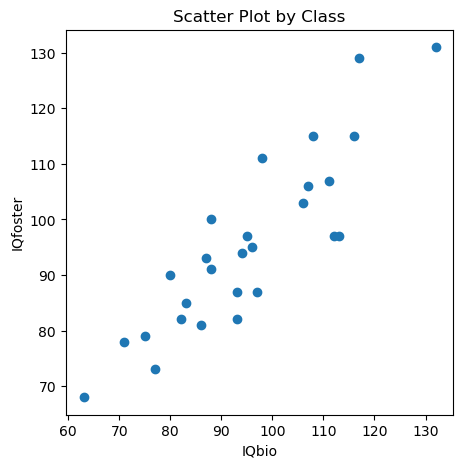

In [6]:
# With labels
plt.figure(figsize=(5, 5))
plt.scatter(iq_df['IQbio'], iq_df['IQfoster'])
plt.xlabel('IQbio')
plt.ylabel('IQfoster')
plt.title('Scatter Plot by Class')
plt.show()

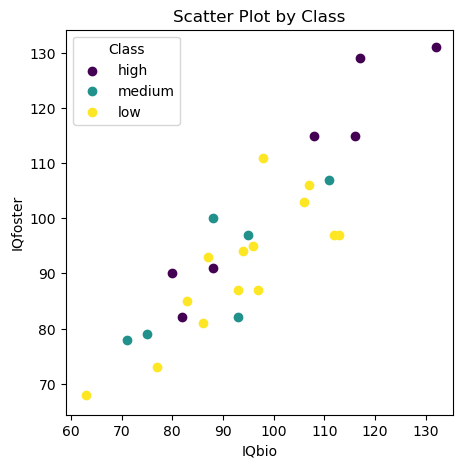

In [7]:
# Create color_map 
# Many choices here: https://matplotlib.org/stable/users/explain/colors/colormaps.html 
class_unique = iq_df['class'].unique()
colors = plt.cm.viridis(np.linspace(0, 1, len(class_unique))) 
color_map = dict(zip(class_unique, colors))

# Create the scatter plot
plt.figure(figsize=(5, 5))
for cls in class_unique:
    subset = iq_df[iq_df['class'] == cls]
    plt.scatter(subset['IQbio'], subset['IQfoster'], color=color_map[cls], label=cls)

plt.xlabel('IQbio')
plt.ylabel('IQfoster')
plt.title('Scatter Plot by Class')
plt.legend(title='Class')
plt.show()

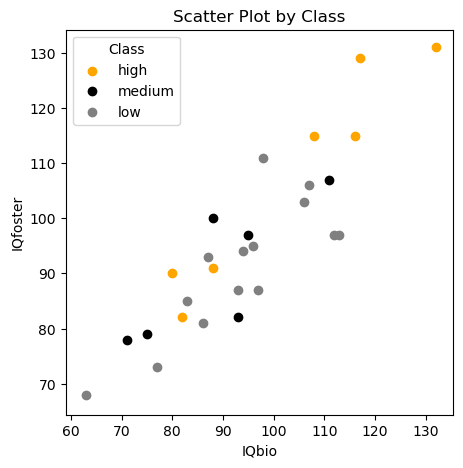

In [8]:
# Simple colors
class_unique = iq_df['class'].unique()
colors = ["orange","black","grey"]
color_map = dict(zip(class_unique, colors))

# Create the scatter plot
plt.figure(figsize=(5, 5))
for cls in class_unique:
    subset = iq_df[iq_df['class'] == cls]
    plt.scatter(subset['IQbio'], subset['IQfoster'], color=color_map[cls], label=cls)

plt.xlabel('IQbio')
plt.ylabel('IQfoster')
plt.title('Scatter Plot by Class')
plt.legend(title='Class')
plt.show()

## Subplots

In [9]:
bank_df = pd.read_csv("../data/bank.csv")
bank_df.head(5)

,age,job,marital,education,default,balance,housing,contact,duration,campaign,pdays,previous,poutcome,signed up
0,43,self-employed,married,tertiary,no,64,no,unknown,230,2,-1,0,unknown,0
1,74,retired,married,primary,no,5539,no,cellular,253,2,181,1,success,0
2,33,management,married,tertiary,no,373,no,cellular,384,1,-1,0,unknown,0
3,37,blue-collar,married,secondary,no,934,no,unknown,258,2,-1,0,unknown,0
4,30,technician,married,tertiary,no,1,no,cellular,69,21,-1,0,unknown,0


In [10]:
# Filter down df
bank_df = bank_df[['age', 'balance', 'poutcome', 'education']]
bank_df.head(5)

,age,balance,poutcome,education
0,43,64,unknown,tertiary
1,74,5539,success,primary
2,33,373,unknown,tertiary
3,37,934,unknown,secondary
4,30,1,unknown,tertiary


In [11]:
# Add a new column for 'High Balance' that contains 'high' if balance above threshold
high_balance_threshold = 5000 
bank_df['high_balance'] = bank_df['balance'].apply(lambda x: 'high' if x > high_balance_threshold else 'low')
bank_df.head(5)

,age,balance,poutcome,education,high_balance
0,43,64,unknown,tertiary,low
1,74,5539,success,primary,high
2,33,373,unknown,tertiary,low
3,37,934,unknown,secondary,low
4,30,1,unknown,tertiary,low


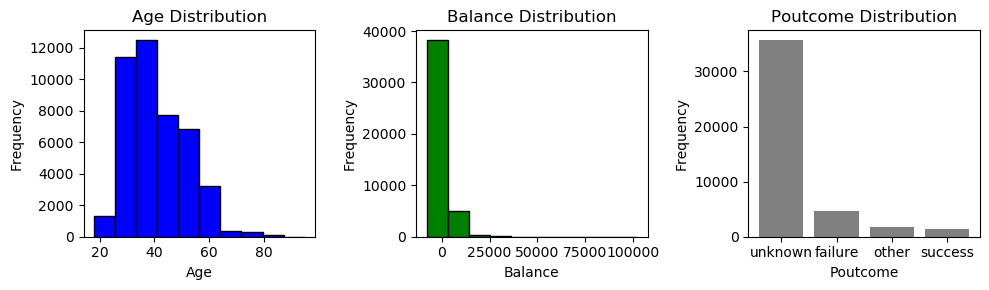

In [12]:
# Create a 1x3 subplot for histograms
plt.figure(figsize=(10, 3))
plt.subplot(1, 3, 1)
plt.hist(bank_df['age'], color='blue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.hist(bank_df['balance'], color='green', edgecolor='black')
plt.title('Balance Distribution')
plt.xlabel('Balance')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
# Assuming 'poutcome' is categorical with values like 'success', 'failure', etc.
poutcome_counts = bank_df['poutcome'].value_counts()
plt.bar(poutcome_counts.index, poutcome_counts.values, color='grey')
plt.title('Poutcome Distribution')
plt.xlabel('Poutcome')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

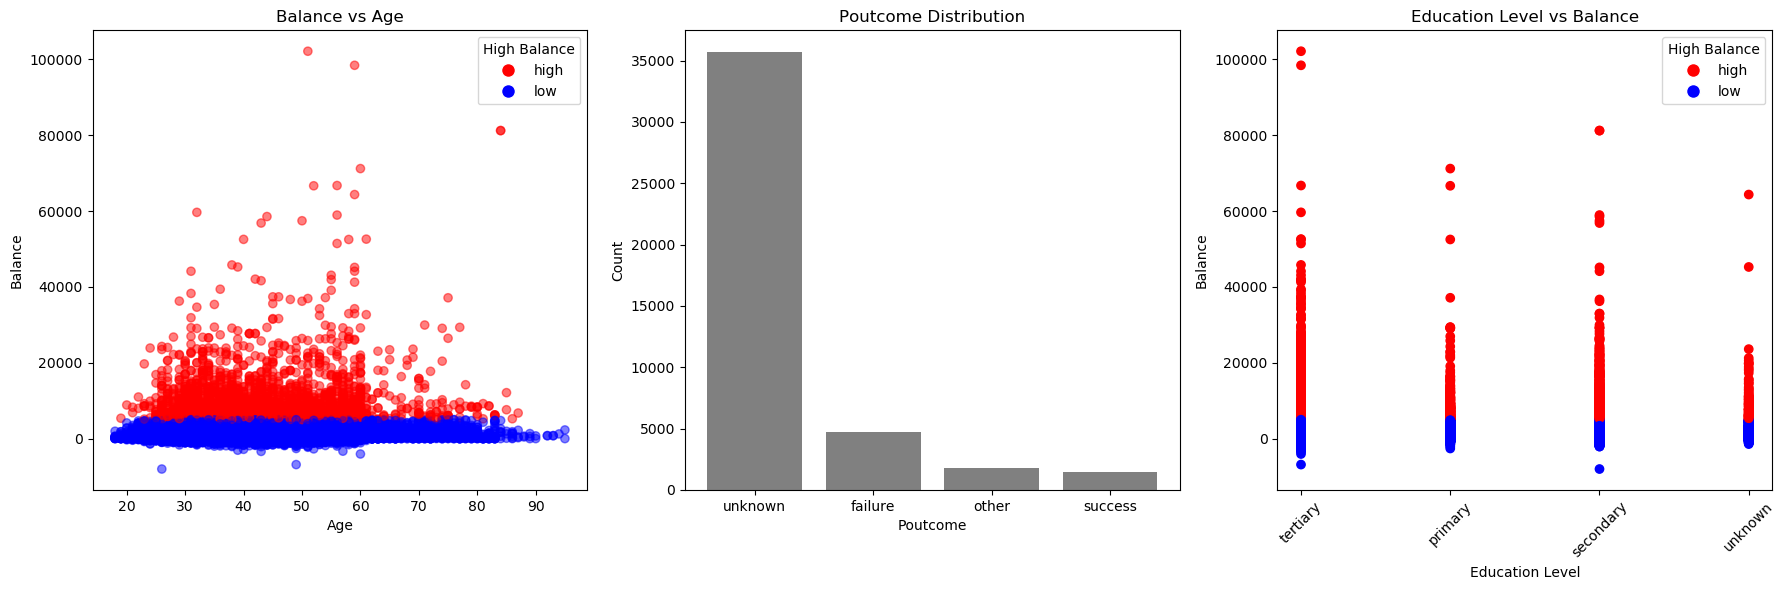

In [13]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Create a legend 
colors = {'high': 'red', 'low': 'blue'}  # Color mapping
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=colors[label], markersize=10, label=label) for label in colors]

# Subplot 1: Scatter plot of balance against age, colored by high_balance
scatter = axes[0].scatter(bank_df['age'], bank_df['balance'], c=bank_df['high_balance'].map(colors), alpha=0.5)
axes[0].set_title('Balance vs Age')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Balance')
axes[0].legend(title='High Balance', handles=handles, loc='upper right')

# Subplot 2: Bar plot of poutcome distribution
poutcome_counts = bank_df['poutcome'].value_counts()
axes[1].bar(poutcome_counts.index, poutcome_counts.values, color='grey')
axes[1].set_title('Poutcome Distribution')
axes[1].set_xlabel('Poutcome')
axes[1].set_ylabel('Count')

# Subplot 3: Scatter plot for education level
# Assuming 'balance' is the numeric value we are plotting against 'education'
unique_education_levels = bank_df['education'].unique()
colors = bank_df['high_balance'].map({'high': 'red', 'low': 'blue'})
# Mapping each education level to a numeric value for plotting
education_numeric = {edu: i for i, edu in enumerate(unique_education_levels)}
axes[2].scatter(bank_df['education'].map(education_numeric), bank_df['balance'], c=colors)
axes[2].set_title('Education Level vs Balance')
axes[2].set_xlabel('Education Level')
axes[2].set_ylabel('Balance')
axes[2].set_xticks(list(education_numeric.values()))
axes[2].set_xticklabels(education_numeric.keys(), rotation=45)
axes[2].legend(title='High Balance', handles=handles, loc='upper right')

plt.tight_layout()
plt.show()